In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

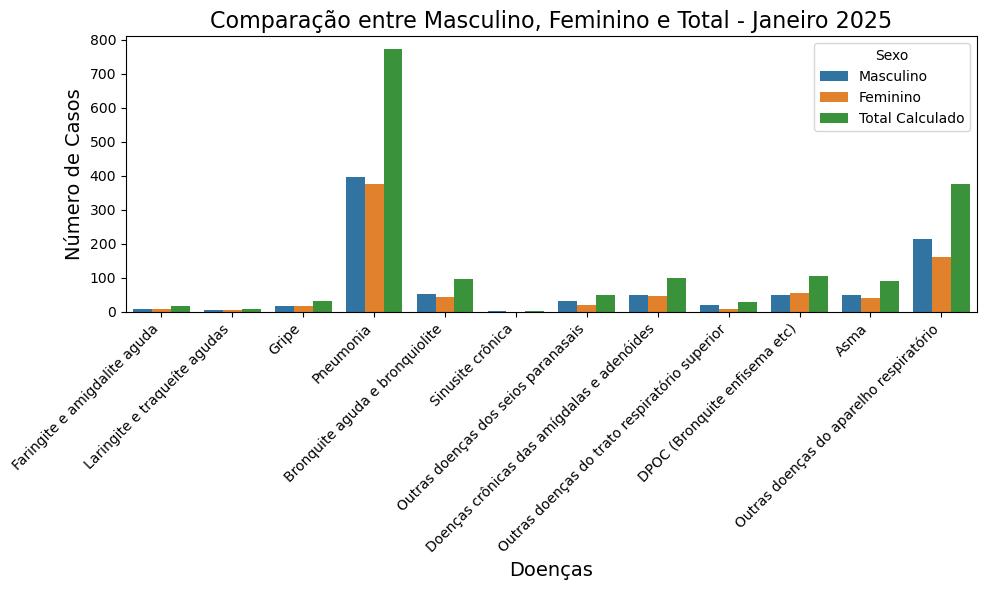

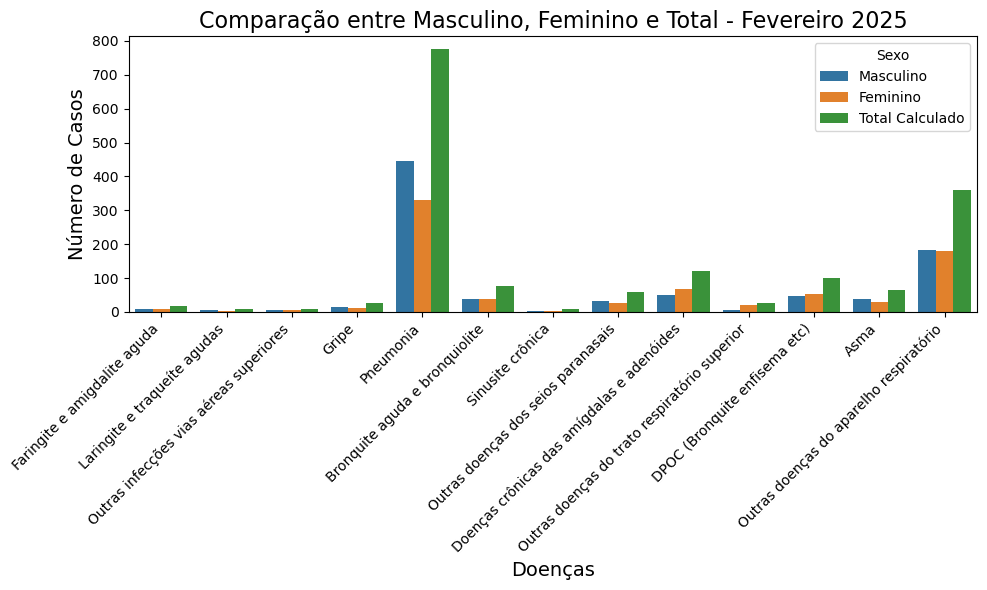

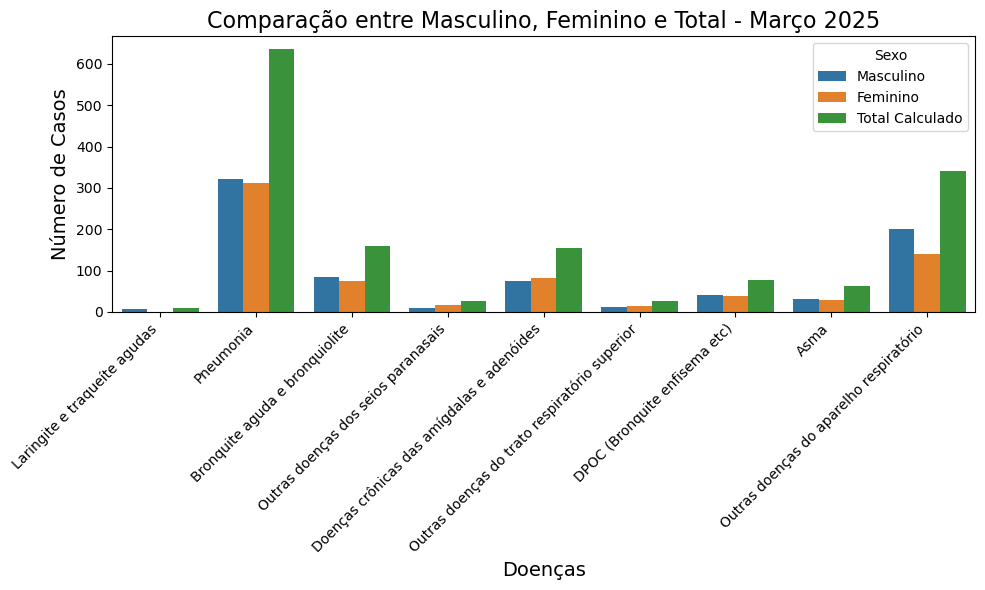

In [2]:
# Função para ler o arquivo .txt e retornar o DataFrame
def ler_arquivo(nome_arquivo):
    df = pd.read_csv(nome_arquivo, sep=';', header=None, names=["Doença", "Masculino", "Feminino", "Total"])
    df["Doença"] = df["Doença"].str.strip()  # Ajusta a formatação da coluna 'Doença' para remover espaços extras
    return df

# Lendo os arquivos de janeiro, fevereiro e março
df_jan = ler_arquivo('dados_doencas_jan.txt')
df_fev = ler_arquivo('dados_doencas_fev.txt')
df_mar = ler_arquivo('dados_doencas_mar.txt')

# Função para gerar gráfico individual por mês
def grafico_individual(df, mes):
    df['Total Calculado'] = df['Masculino'] + df['Feminino']  # Calcula o total de casos
    
    # Reformatando os dados
    df_melted = df.melt(id_vars=['Doença'], value_vars=['Masculino', 'Feminino', 'Total Calculado'],
                        var_name='Sexo', value_name='Número de Casos')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Doença', y='Número de Casos', hue='Sexo', data=df_melted, dodge=True, edgecolor="none")
    
    # Título e labels
    plt.title(f"Comparação entre Masculino, Feminino e Total - {mes}", fontsize=16)
    plt.xlabel("Doenças", fontsize=14)
    plt.ylabel("Número de Casos", fontsize=14)
    
    # Ajuste o layout para evitar sobreposição
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    
    # Exibe o gráfico
    plt.show()

# Gráfico para Janeiro
grafico_individual(df_jan,"Janeiro 2025")

# Gráfico para Fevereiro
grafico_individual(df_fev,"Fevereiro 2025")

# Gráfico para Março
grafico_individual(df_mar,"Março 2025")

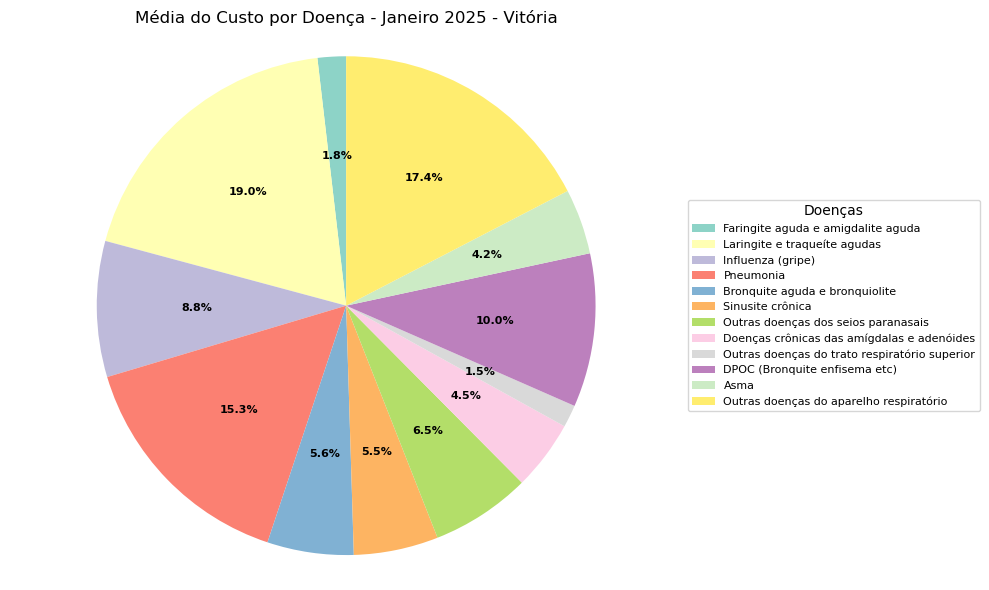

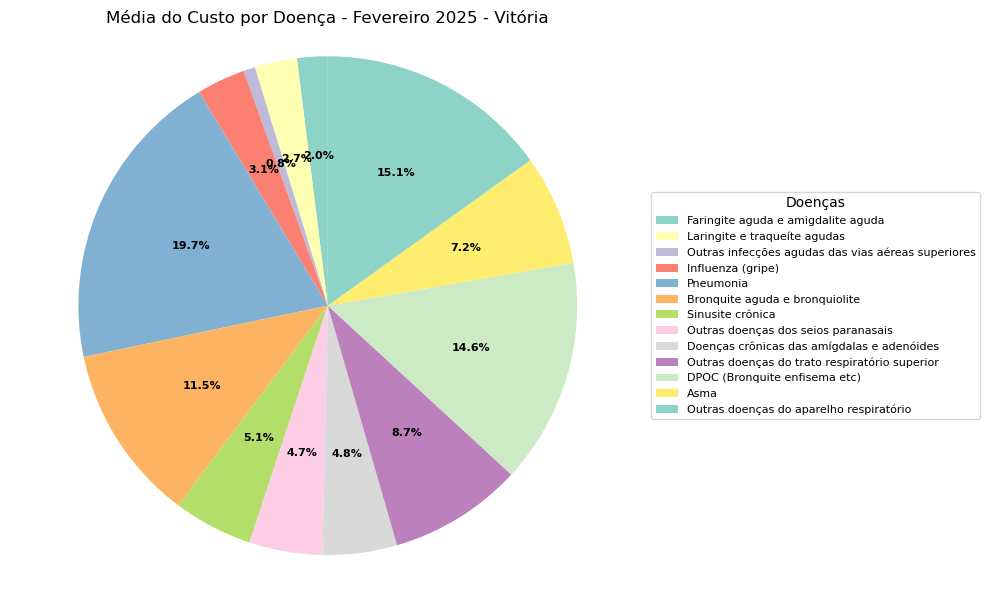

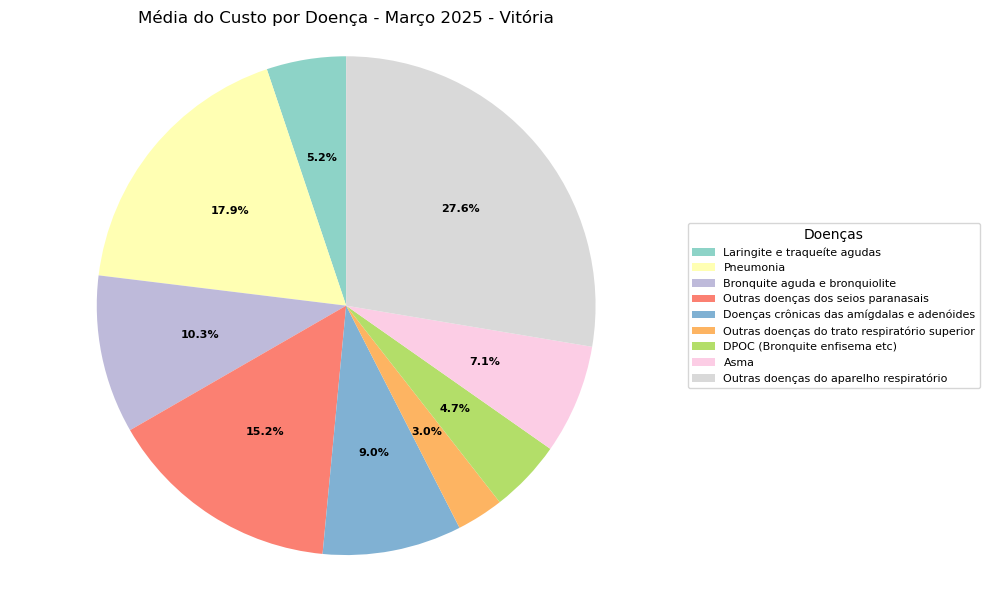

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para ler arquivos com 2 colunas (Doença e Custo Médio)
def ler_arquivo(nome_arquivo):
    try:
        df = pd.read_csv(nome_arquivo, sep=';', header=None, names=["Doença", "Custo Médio"])
        df["Doença"] = df["Doença"].astype(str).str.strip()
        df["Custo Médio"] = pd.to_numeric(df["Custo Médio"].astype(str).str.replace(",", "."), errors="coerce")
        df = df[df["Custo Médio"].notna() & (df["Custo Médio"] > 0)]

        if df.empty:
            print(f"Aviso: Nenhum dado válido encontrado em '{nome_arquivo}'.")
            return None
        return df

    except Exception as e:
        print(f"Erro ao processar '{nome_arquivo}': {e}")
        return None

# Função para gráfico de pizza com porcentagens internas e legenda ao lado
def grafico_pizza(df, mes):
    if df is None or df.empty:
        print(f"Dados inválidos ou vazios para {mes}.")
        return

    plt.figure(figsize=(10, 6))  # Tamanho do gráfico

    # Geração do gráfico de pizza com porcentagens
    wedges, texts, autotexts = plt.pie(
        df['Custo Médio'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set3", len(df)),
        textprops={'fontsize': 8}
    )

    # Legenda ao lado
    plt.legend(wedges, df['Doença'], title="Doenças", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
    plt.setp(autotexts, size=8, weight="bold", color="black")
    plt.title(f"Média do Custo por Doença - {mes} 2025 - Vitória", fontsize=12)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Lendo os arquivos
df_jan = ler_arquivo("custo_medio_int_jan.txt")
df_fev = ler_arquivo("custo_medio_int_fev.txt")
df_mar = ler_arquivo("custo_medio_int_mar.txt")

# Gerando os gráficos
grafico_pizza(df_jan, "Janeiro")
grafico_pizza(df_fev, "Fevereiro")
grafico_pizza(df_mar, "Março")

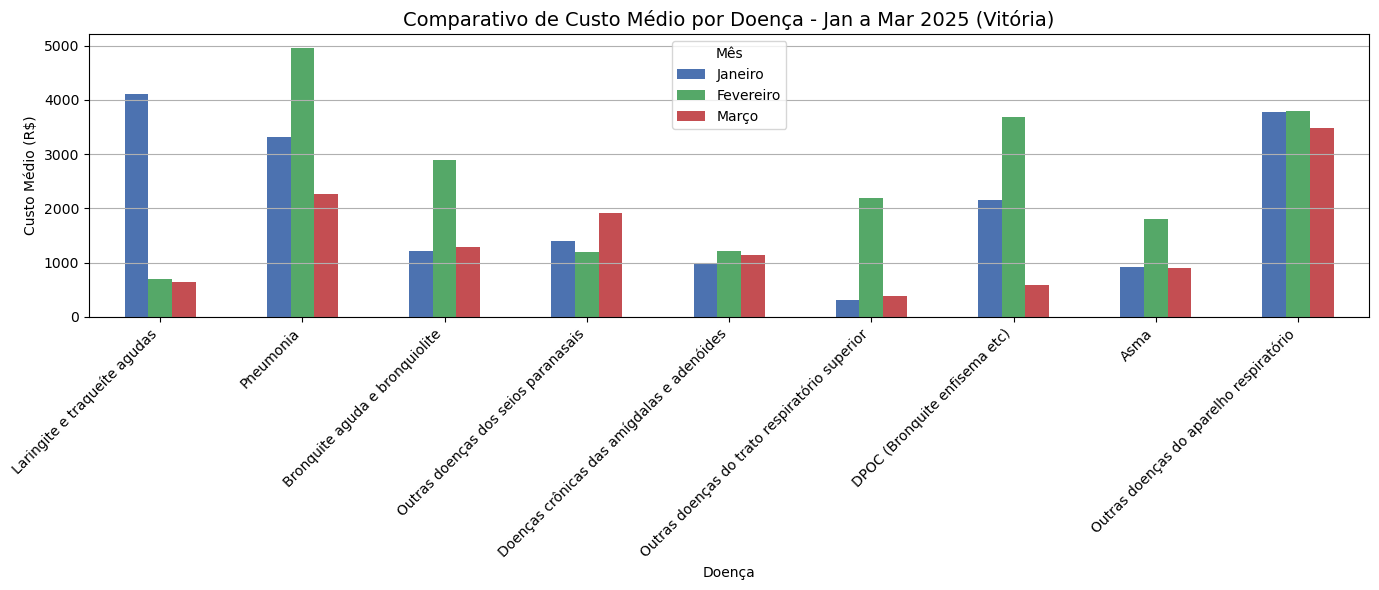

In [5]:
def grafico_comparativo_trimestral(df_jan, df_fev, df_mar):
    if df_jan is None or df_fev is None or df_mar is None:
        print("Um dos meses não possui dados válidos.")
        return

    # Renomear colunas para mesclar
    df_jan = df_jan.rename(columns={"Custo Médio": "Janeiro"})
    df_fev = df_fev.rename(columns={"Custo Médio": "Fevereiro"})
    df_mar = df_mar.rename(columns={"Custo Médio": "Março"})

    # Merge encadeado
    df_total = pd.merge(df_jan, df_fev, on="Doença", how="inner")
    df_total = pd.merge(df_total, df_mar, on="Doença", how="inner")

    # Plot
    df_total.set_index("Doença")[["Janeiro", "Fevereiro", "Março"]].plot(
        kind='bar', figsize=(14, 6), color=["#4c72b0", "#55a868", "#c44e52"]
    )

    plt.title("Comparativo de Custo Médio por Doença - Jan a Mar 2025 (Vitória)", fontsize=14)
    plt.ylabel("Custo Médio (R$)")
    plt.xlabel("Doença")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Mês")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Executar gráfico
grafico_comparativo_trimestral(df_jan,df_fev,df_mar)